##Section 1



In [ ]:
##########  TEAM   ##########
# Adwin Sanjo J      - 18Z202
# Anantharooban B R  - 18Z205
# Arun prashath S    - 18Z208
# Jayabharathi A     - 18Z221
# Ridhi K C          - 18Z241
#####   TOPIC : "AIRLINE REACHABILITY NETWORK"

# 1- Generating graph through NetworkX

import networkx as nx 
import matplotlib.pyplot as plt                                                     #nx.graph()
graph =nx.read_weighted_edgelist("reachability.txt", comments='#', delimiter=None, create_using=nx.DiGraph() , nodetype=int, encoding='utf-8')
graph
# Setting the weights for all edges to 1
for e in graph.edges():
    graph[e[0]][e[1]]['weight'] = 1
    

In [ ]:
# Edited  
#To import reachability-meta dataset
import pandas as pd
with open('reachability-meta.csv','r') as csv_file:
    lines = csv_file.readlines()

lines = lines[1:]
city = []
k=0
city_no=dict()
#Storing the names of each airport city that corresponds to a node
for line in lines:
    data = line.split(',')
    temp = (data[1]+data[2])[1:-1].lower()
    city.append(temp)
    city_no[temp]=k
    k+=1
print(city)

['abbotsford bc', 'aberdeen sd', 'abilene tx', 'akron/canton oh', 'alamosa co', 'albany ga', 'albany ny', 'albuquerque nm', 'alexandria la', 'allentown/bethlehem/easton pa', 'alliance ne', 'alpena mi', 'altoona pa', 'amarillo tx', 'anchorage ak', 'appleton wi', 'asheville nc', 'aspen co', 'athens ga', 'atlanta ga', 'atlantic city nj', 'augusta ga', 'augusta me', 'austin tx', 'bagotville qc', 'baie comeau qc', 'bakersfield ca', 'baltimore md', 'bangor me', 'bar harbor me', 'barrow ak', 'bathurst nb', 'baton rouge la', 'beaumont/pt. arthur tx', 'beckley wv', 'bellingham wa', 'bemidji mn', 'bethel ak', 'billings mt', 'binghamton ny', 'birmingham al', 'bismarck nd', 'blanc sablon qc', 'bloomington il', 'bluefield wv', 'boise id', 'boston ma', 'bozeman mt', 'bradford pa', 'brainerd mn', 'brownsville tx', 'brunswick ga', 'buffalo ny', 'burbank ca', 'burlington ia', 'burlington vt', 'butte mt', 'calgary ab', 'campbell river bc', 'cape girardeau mo', 'casper wy', 'castlegar bc', 'cedar city ut

In [ ]:
# 2- Generating summary of Graph
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 456
Number of edges: 71959
Average in degree: 157.8048
Average out degree: 157.8048


In [ ]:
# 3- Visualizing Betweeness Centrality ---> Airports that connects remote places

pos = nx.spring_layout(graph)
btwn_ctly = nx.betweenness_centrality(graph, normalized=True, endpoints=True)
# To Sort the nodes in descending order based on the Betweeness centrality measure
node_color = [70.0 * graph.degree(v) for v in graph] # Same degree nodes have same colour
node_size =  [(v+0.01) * 50000 for v in btwn_ctly.values()] # Same Centality nodes --> be in same size
plt.figure(figsize=(10,10)) # Width&Height of Square box
nx.draw_networkx(graph, pos=pos, with_labels=False,node_color=node_color,node_size=node_size )
plt.axis('on')
max_betweeness = sorted(btwn_ctly, key=btwn_ctly.get, reverse=True)[:5] #RESULT: Node no. with top 5 highest betweeness
print("Airport Cities which connect remote places")
#Displaying the Results
for i in max_betweeness:
  print(city[i])

Cities with Important Connection
los angeles ca
denver co
new york ny
toronto on
san francisco ca


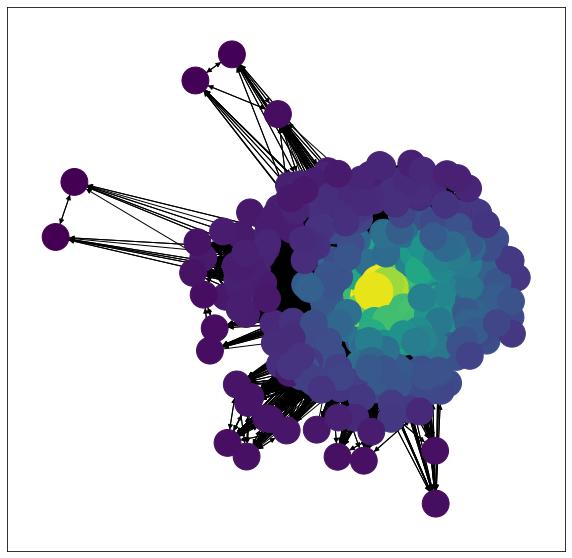

In [ ]:
# 4 a - Visualizing in-Degree Centrality ---> Busiest & Central HUB like Airports

degCent = nx.in_degree_centrality(graph) # get the in-degree centerality of each node
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [(v+0.01) * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

#sort the nodes in-degree centrality list
max_in_degree = sorted(degCent, key=degCent.get, reverse=True)[:5]
print('Airport Cities with High Arrivals')
for i in max_in_degree:
  print(city[i]) # display top 5 cities name

Airport Cities with High Arrivals
los angeles ca
san francisco ca
dallas/fort worth tx
chicago il
las vegas nv


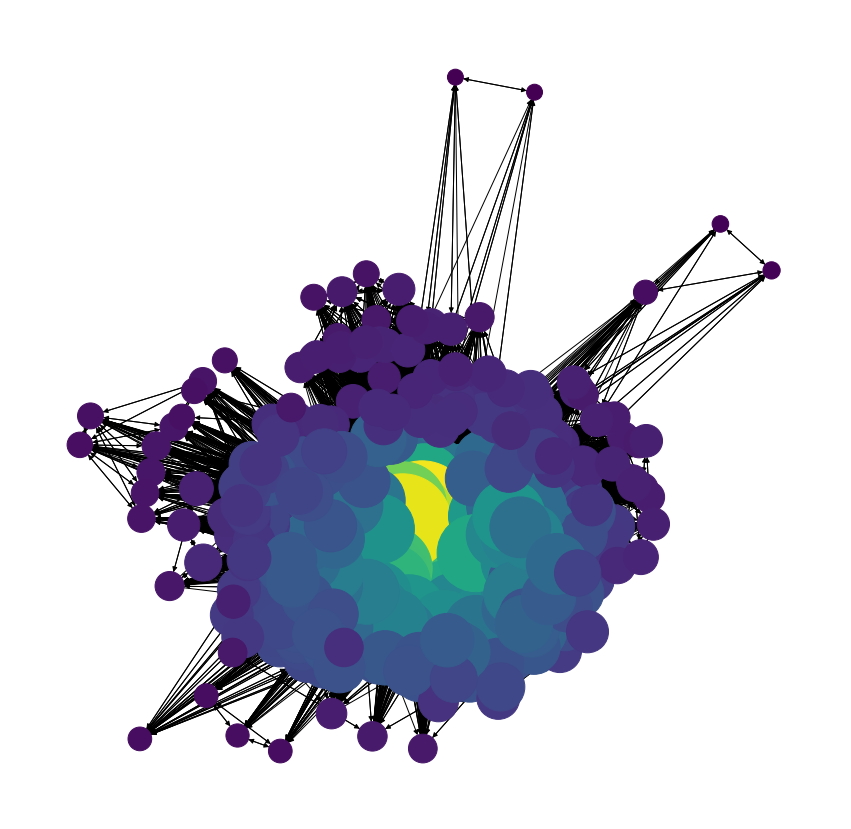

In [ ]:
# 4 b - Visualizing out-Degree Centrality ---> Busiest & Central HUB like Airports
pos = nx.spring_layout(graph)
degCent = nx.out_degree_centrality(graph)# get the out-degree centerality of each node
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [(v+0.01) * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
max_out_degree = sorted(degCent, key=degCent.get, reverse=True)[:5] # sort the out-degree centrality list
print('Airport Cities with High Departures') 
for i in max_out_degree:
  print(city[i]) # display top 5 cities name

Airport Cities with High Departures
los angeles ca
las vegas nv
chicago il
san francisco ca
denver co


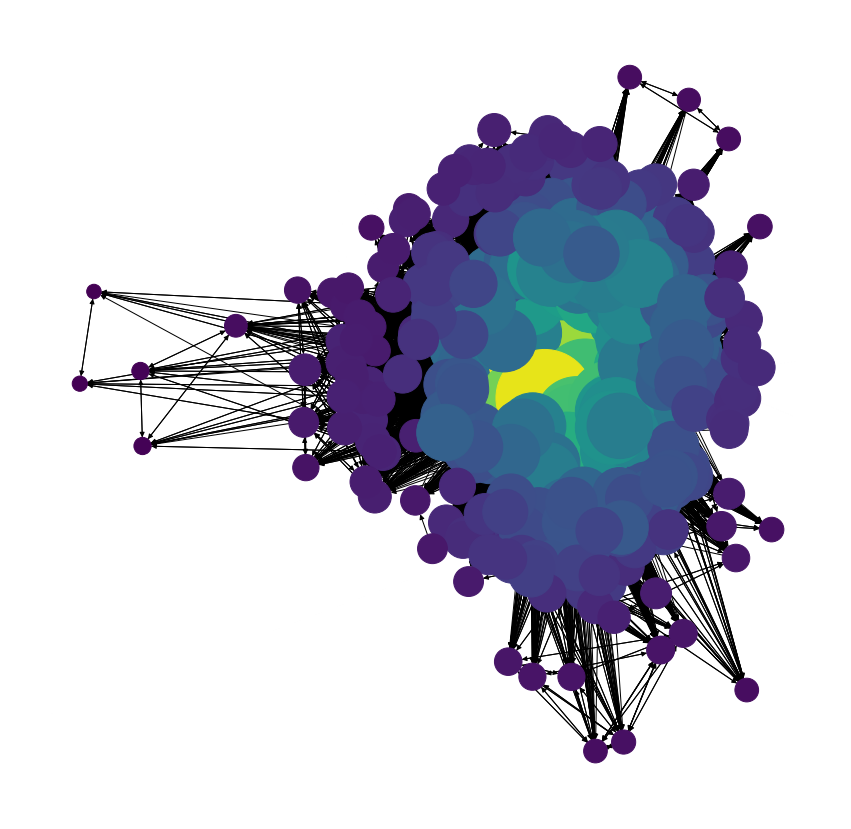

In [ ]:
# 5- Visualizing Closeness Centrality ---> Airport having many closest Airports(highest Accessibility)
pos = nx.spring_layout(graph)
cloCent = nx.closeness_centrality(graph) # get the Closeness centerality of each node
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(graph, pos=pos, with_labels=False,node_color=node_color,node_size=node_size )
plt.axis('off')
close=sorted(cloCent, key=cloCent.get, reverse=True)[:5] # sort the Closeness centrality list
for i in close:
  print(city[i]) # display top 5 cities name

los angeles ca
san francisco ca
dallas/fort worth tx
chicago il
las vegas nv


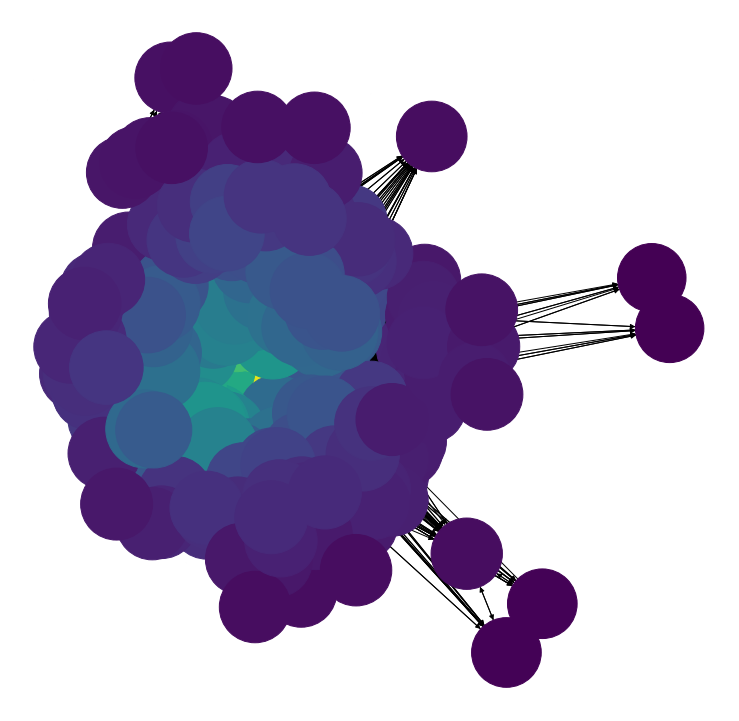

In [ ]:
# 6- Visualizing Eigen vector Centrality ---> Influential Nodes (Airports)

eigCent = nx.eigenvector_centrality(graph) # get the Eigen vector centerality of each node
node_color = [20000.0 * graph.degree(v) for v in graph]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
max_eigen_values = sorted(eigCent, key=eigCent.get, reverse=True)[:5] # sort the Eigen vector centrality list

for i in max_eigen_values:
  print(city[i]) # display top 5 cities name

los angeles ca
san francisco ca
dallas/fort worth tx
las vegas nv
chicago il


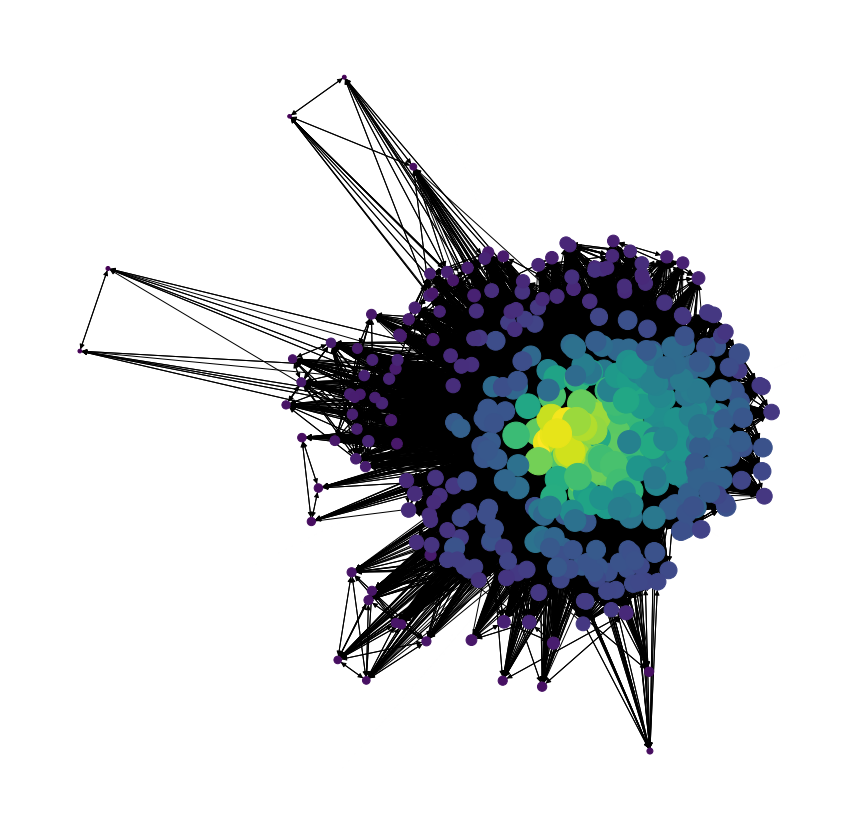

In [ ]:
# 7 Shortest Path from a source to destination
source = input('Enter the Source City : ')
destination = input('Enter the destination City :')
source_node = city_no[source.lower()] # find the source city id
destination_node = city_no[destination.lower()] # find destination city id
path = nx.shortest_path(graph,source_node,destination_node,method='dijkstra') # finding the shortest path
sample_graph = graph

for i in path:
  print(city[i],end=" -> ") # display the result
print()
try:
  rm = input("Enter the city to remove : ")
  # Finding Shortest Path after removing a node
  sample_graph.remove_node(city_no[rm]) #  find the city id which we want to remove
  path = nx.shortest_path(sample_graph,source_node,destination_node,method='dijkstra')  # finding the shortst path after removed the node
  for i in path:
    print(city[i],end=" -> ") # display the result
except:
  pass

Enter the Source City : abbotsford BC
Enter the destination City :anchorage AK
abbotsford bc -> albany ny -> anchorage ak -> 
Enter the city to remove : albany ny
abbotsford bc -> calgary ab -> anchorage ak -> 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt                                                     #nx.graph()
G =nx.read_weighted_edgelist("reachability.txt", comments='#', delimiter=None, create_using=nx.DiGraph() , nodetype=int, encoding='utf-8')
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 456
Number of edges: 71959
Average in degree: 157.8048
Average out degree: 157.8048


graph represent no of nodes VS degree( both in-degree and out-degree separatly)


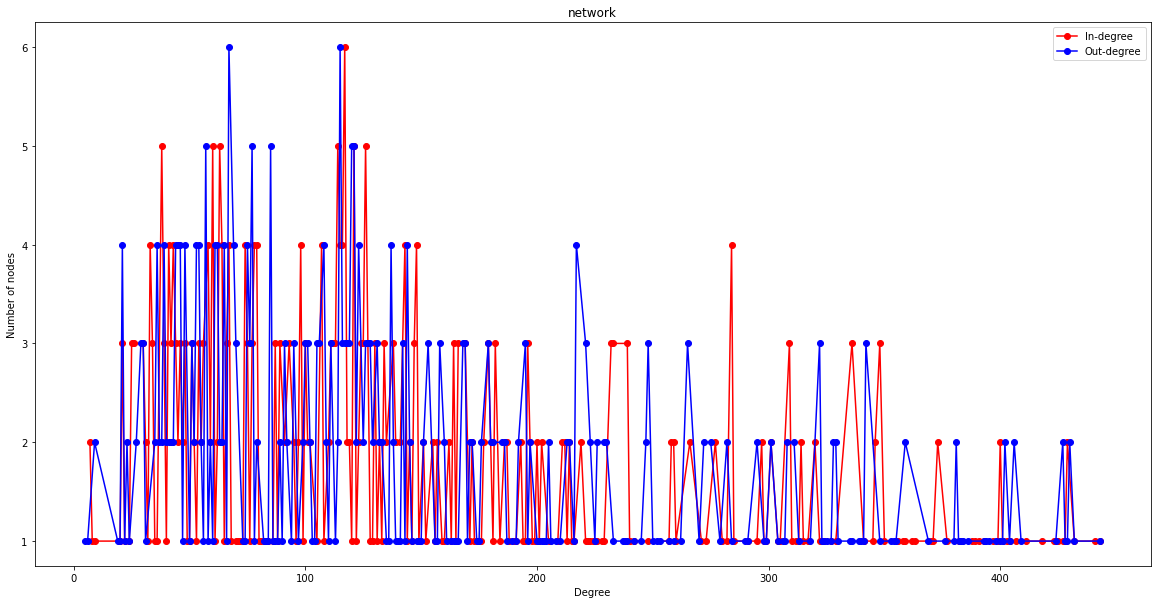

In [ ]:
# graph represent no of nodes VS degree( both in-degree and out-degree separatly)
print("graph represent no of nodes VS degree( both in-degree and out-degree separatly)")
plt.rcParams["figure.figsize"] = (20,10) # adjusting result graph size

in_degrees = G.in_degree() # dictionary node:degree
in_degrees = [v for k, v in in_degrees] # separating degree
in_values = sorted(set(in_degrees)) # sorting the degree values
in_hist = [in_degrees.count(x) for x in in_values] # finding no of nodes have a x degree for all x in calculated degree
plt.plot(in_values,in_hist,'ro-') # ploting in-degree

out_degrees = G.out_degree() #calculating out-degree
out_degrees = [v for k, v in out_degrees]  # separating degree
out_values = sorted(set(out_degrees)) # sorting the degree values
out_hist = [out_degrees.count(x) for x in out_values] # finding no of nodes have a x degree for all x in calculated degree
plt.plot(out_values,out_hist,'bo-') # ploting out-degree
plt.legend(['In-degree','Out-degree']) # scale and reference
plt.xlabel('Degree') # x label
plt.ylabel('Number of nodes') # y label
plt.title('network') # title of the graph
plt.show() # plot the graph


source4
target44
distance2
[[(4, 23), (23, 44)], [(4, 46), (46, 44)], [(4, 52), (52, 44)], [(4, 57), (57, 44)], [(4, 63), (63, 44)], [(4, 94), (94, 44)], [(4, 100), (100, 44)], [(4, 136), (136, 44)], [(4, 178), (178, 44)], [(4, 204), (204, 44)], [(4, 230), (230, 44)], [(4, 246), (246, 44)], [(4, 252), (252, 44)], [(4, 266), (266, 44)], [(4, 269), (269, 44)], [(4, 293), (293, 44)], [(4, 294), (294, 44)], [(4, 302), (302, 44)], [(4, 306), (306, 44)], [(4, 308), (308, 44)], [(4, 323), (323, 44)], [(4, 331), (331, 44)], [(4, 336), (336, 44)], [(4, 350), (350, 44)], [(4, 360), (360, 44)], [(4, 366), (366, 44)], [(4, 367), (367, 44)], [(4, 368), (368, 44)], [(4, 369), (369, 44)], [(4, 383), (383, 44)], [(4, 408), (408, 44)], [(4, 416), (416, 44)], [(4, 428), (428, 44)], [(4, 434), (434, 44)]]


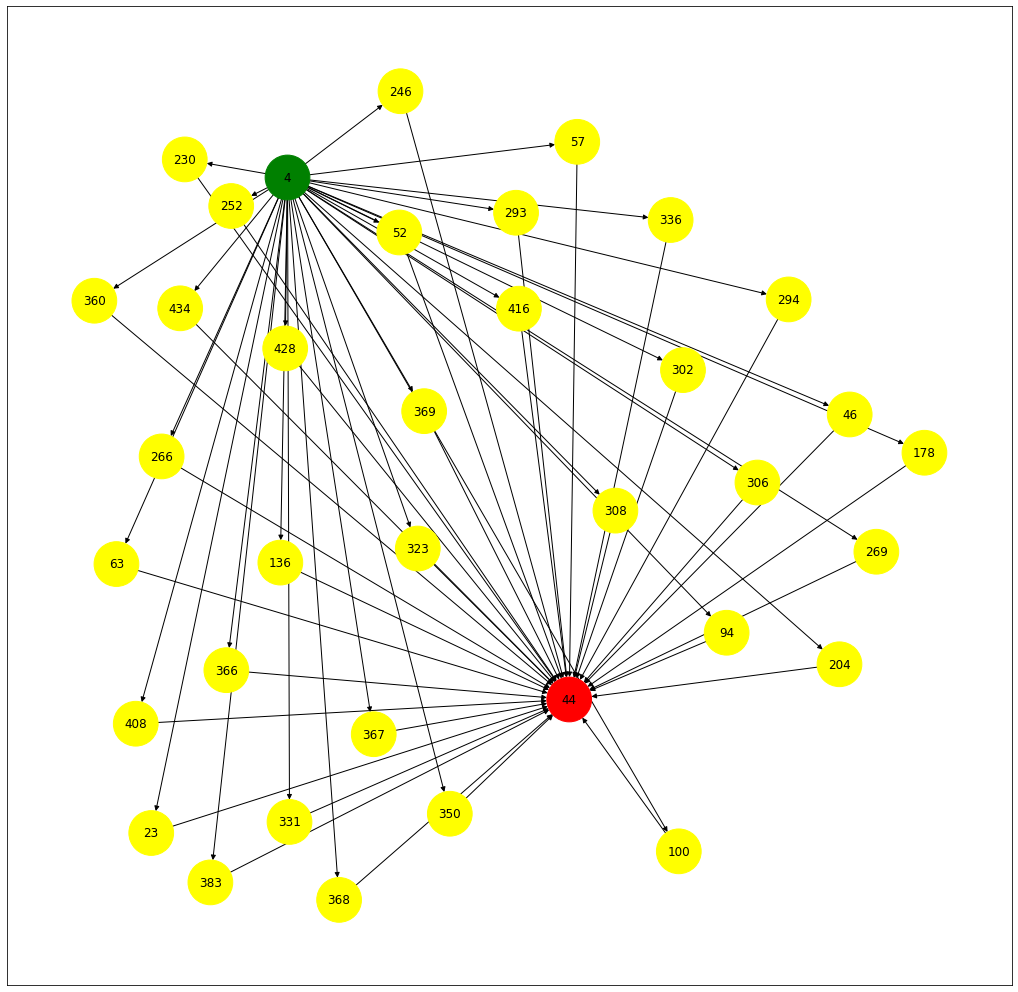

In [ ]:
#visualization of source to target node with given hub distance
sc=int(input("source")) # input : source
tar=int(input("target"))  # input : target
dis=int(input("distance")) # input : no of hubs
ls1=list(nx.all_simple_edge_paths(G,sc,tar,dis))  # get the list of [(source,s1)...(sn,target)] 
print(ls1) # print the list
g=nx.DiGraph() #generate the Digraph
for i in ls1:
  for j in i:
    g.add_edge(j[0],j[1]) # add the edges in the digraph based on calculated list

nodes=list(g.nodes()) #change the object datatype to list
no_col=[]
for i in nodes:
  if i==sc:
    no_col.append("green")  # color the source node as green color
  elif i==tar:
    no_col.append("red")  #color target node as red color
  else:
    no_col.append("yellow") # color other intermidiate nodes as yellow colour
plt.figure(figsize=(18,18)) # Width&Height of output Square box
nx.draw_networkx(g, with_labels=True,node_color=no_col, node_size=2000 ) # generate and visualization of graph 
plt.show() #ploat the graph


source12
limit1
{12: [6, 7, 19, 23, 34, 40, 44, 45, 46, 52, 55, 66, 67, 68, 69, 74, 77, 78, 84, 86, 94, 95, 96, 100, 102, 115, 119, 131, 136, 139, 153, 157, 158, 159, 162, 170, 178, 182, 184, 193, 196, 204, 211, 217, 230, 241, 246, 247, 252, 258, 264, 266, 269, 280, 282, 286, 290, 293, 294, 298, 302, 303, 306, 308, 309, 315, 323, 324, 326, 330, 331, 336, 342, 350, 352, 355, 360, 366, 367, 368, 369, 381, 383, 385, 402, 406, 407, 408, 416, 419, 428, 434, 436, 440, 441]}


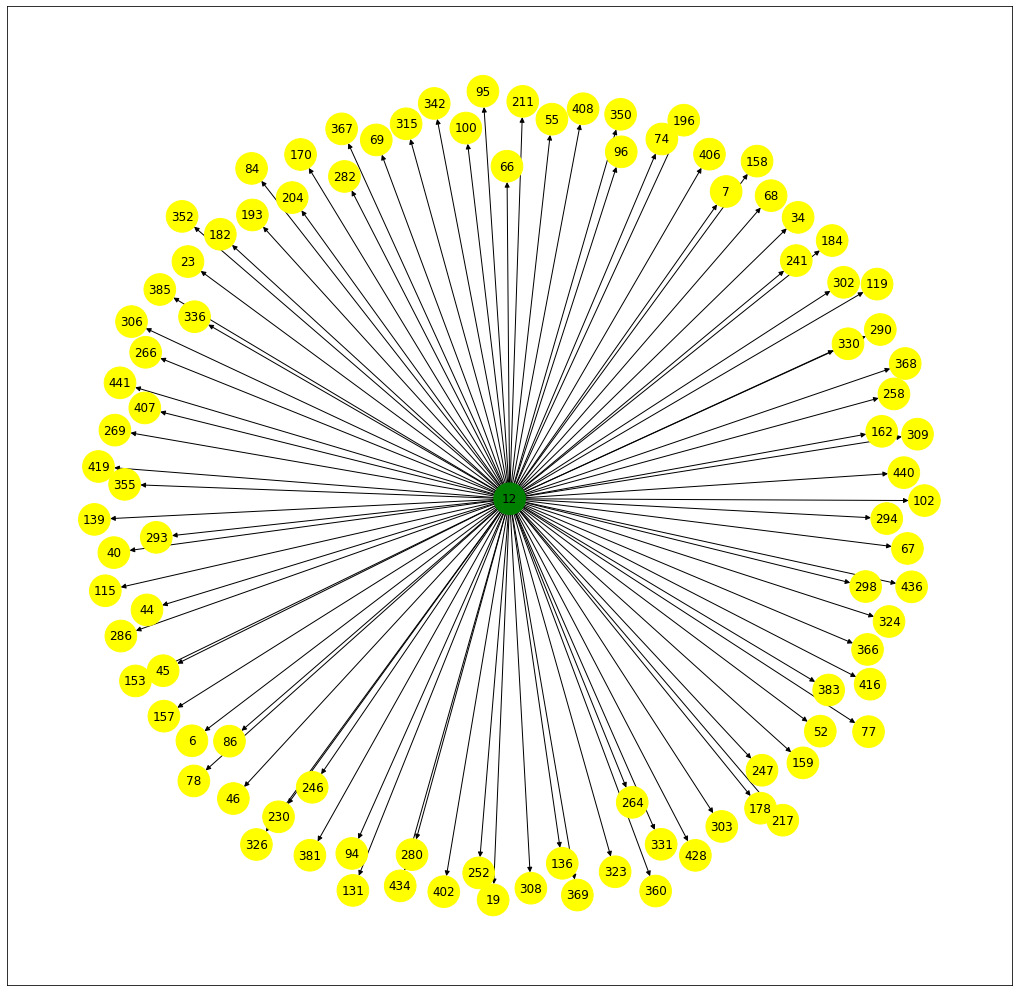

In [ ]:
#visualization of nodes can reached from given node and hub distance 
sc=int(input("source")) #input : source node
lim=int(input("limit")) #INPUT : hub distance 
dic=nx.dfs_successors(G, source=sc, depth_limit=lim) # perform depth first search on gicen source node and with given depth limit
print(dic) # display the list of [from node : { to nodes}]
g=nx.DiGraph() # generate the digraph for calulated list 
for i in dic.keys():
  for j in dic[i]:
    g.add_edge(i,j) # add edge between the node based on the calculated list
nodes=list(g.nodes()) # converting object type to list type
no_col=[]
for i in nodes:
  if i==sc:
    no_col.append("green") # colour source node as green colour
  else:
    no_col.append("yellow") # colour other nodes as yellow color
plt.figure(figsize=(18,18)) # Width&Height of output Square box
nx.draw_networkx(g, with_labels=True,node_color=no_col, node_size=1000 ) # generate the finall graph
plt.show() # plot the graph

In [ ]:
#find the bridgesin the network
G1=G.to_undirected(reciprocal=False, as_view=False) # converting digraph into undirected graph
list(nx.bridges(G1, root=None)) # finding and displaying the bridges

[]

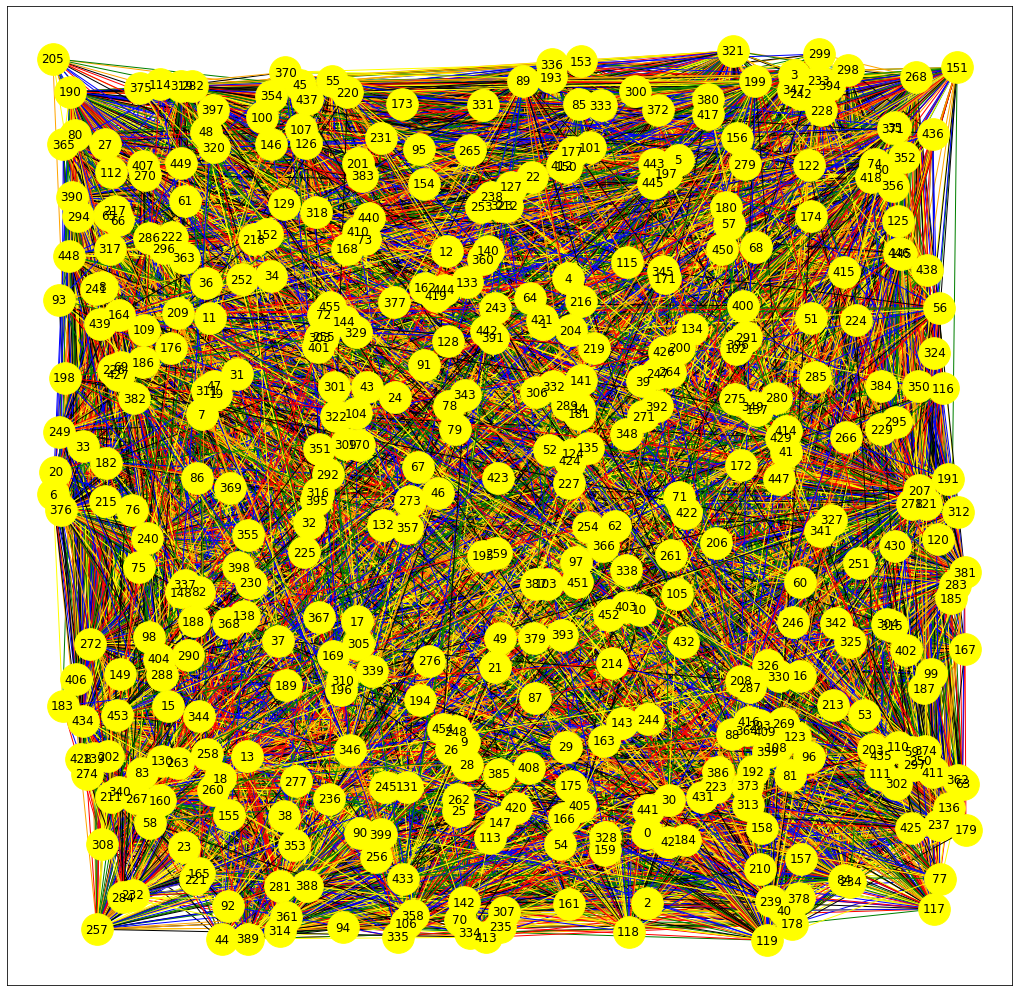

In [ ]:
G1=G.to_undirected(reciprocal=True, as_view=False) # converting digraph into undirected graph
G1.remove_nodes_from(list(nx.isolates(G1))) #remomve the isolated nodes
plt.figure(figsize=(18,18)) # Width&Height of Square box
pos = nx.random_layout(G) #layout
nx.draw_networkx(G1, pos=pos,with_labels=True,node_color="yellow",edge_color=("red","green","blue","black","orange","yellow"),node_size=1000 ) # generate graph
plt.show() # plot the graph

##Section 2

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt 
                                                    #nx.graph()
graph =nx.read_weighted_edgelist("reachability.txt", comments='#', delimiter=None, create_using=None , nodetype=int, encoding='utf-8')
graph
for e in graph.edges():
    graph[e[0]][e[1]]['weight'] = 1
    
 
print(nx.info(graph))


Name: 
Type: Graph
Number of nodes: 456
Number of edges: 37947
Average degree: 166.4342


In [ ]:
import random
selectedNodes = set()
G = graph.copy()
for i in list(G.nodes):
    if i > 19:
      G.remove_node(i)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 89
Average degree:   8.9000


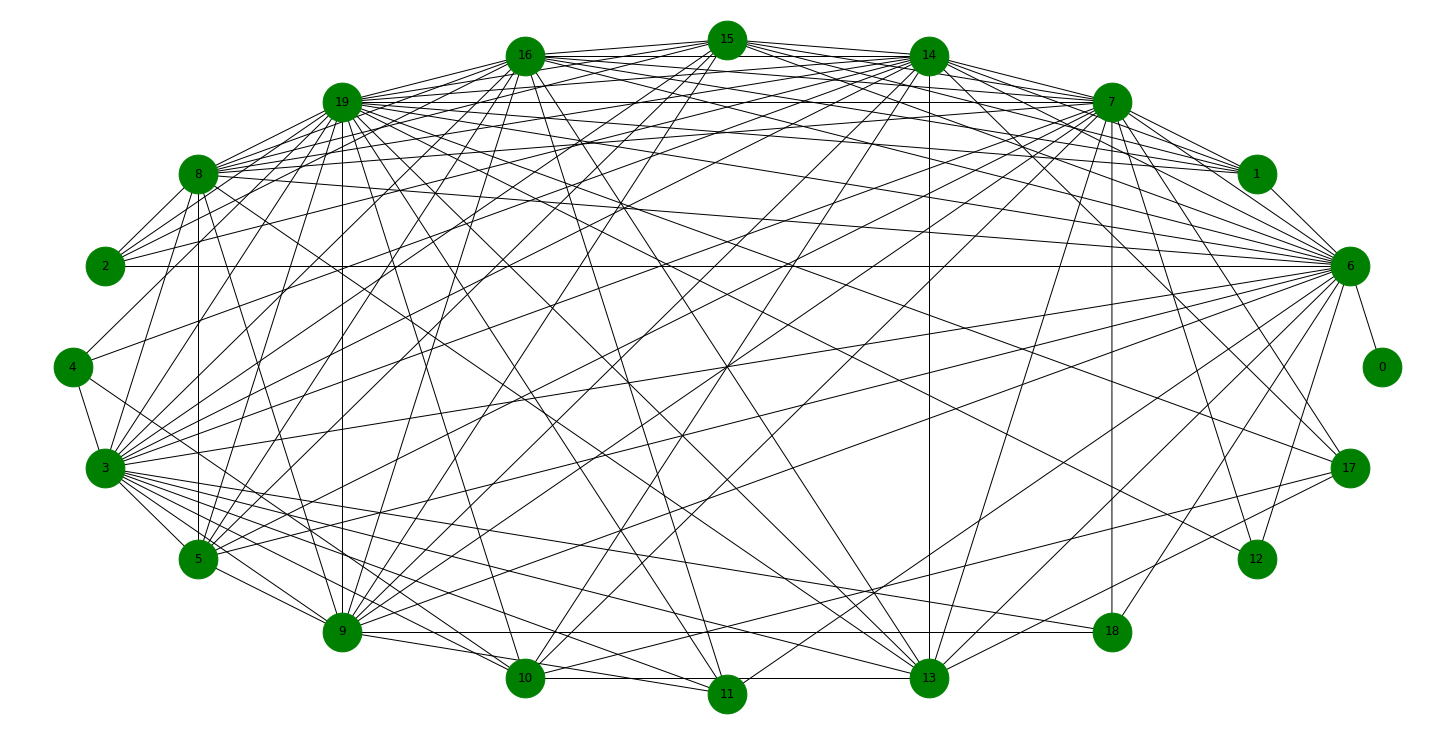

In [ ]:
#Visualising Orginal graph
nx.draw(G, with_labels=True, node_size=1500, node_color="green", pos=nx.circular_layout(G))
plt.show()

In [ ]:
print("Average Clustering Coefficient of Graph : "+str(nx.average_clustering(graph)))
print("Transitivity of the Graph : "+str(nx.transitivity(graph)))
print("Average Shortest Path Length : "+str(nx.average_shortest_path_length(graph)))
#Average Clustering is High
#Transitivity is High 
# Average Shortes Path is Low

Average Clustering Coefficient of Graph : 0.8052283407608015
Transitivity of the Graph : 0.6029460681706936
Average Shortest Path Length : 1.6357046462309621


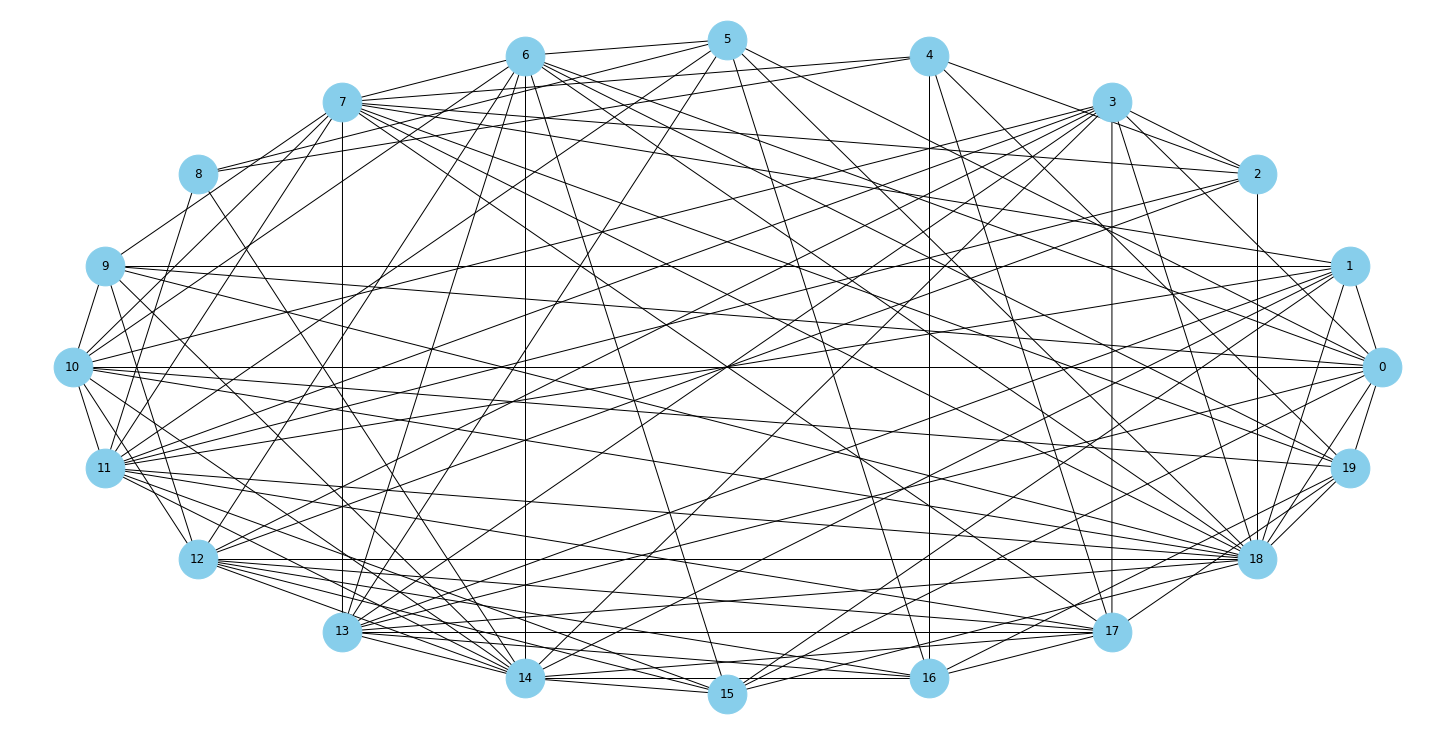

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 88
Average degree:   8.8000


In [ ]:
#Constructing Erdos Renyi Graph 
erdos= nx.erdos_renyi_graph(20,0.455)
nx.draw(erdos, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.circular_layout(erdos))
plt.show()
print(nx.info(erdos))

In [ ]:
#Analysing Erdos Renyi Graph
print("Average Clustering Coefficient of Graph : "+str(nx.average_clustering(erdos)))
print("Transitivity of the Graph : "+str(nx.transitivity(erdos)))
print("Average Shortest Path Length : "+str(nx.average_shortest_path_length(erdos)))

# Average clustering coefficient is Less
# Transitivity is Less
# Average Shortest Path Length is Similar

Average Clustering Coefficient of Graph : 0.48664946164946166
Transitivity of the Graph : 0.48243243243243245
Average Shortest Path Length : 1.5421052631578946


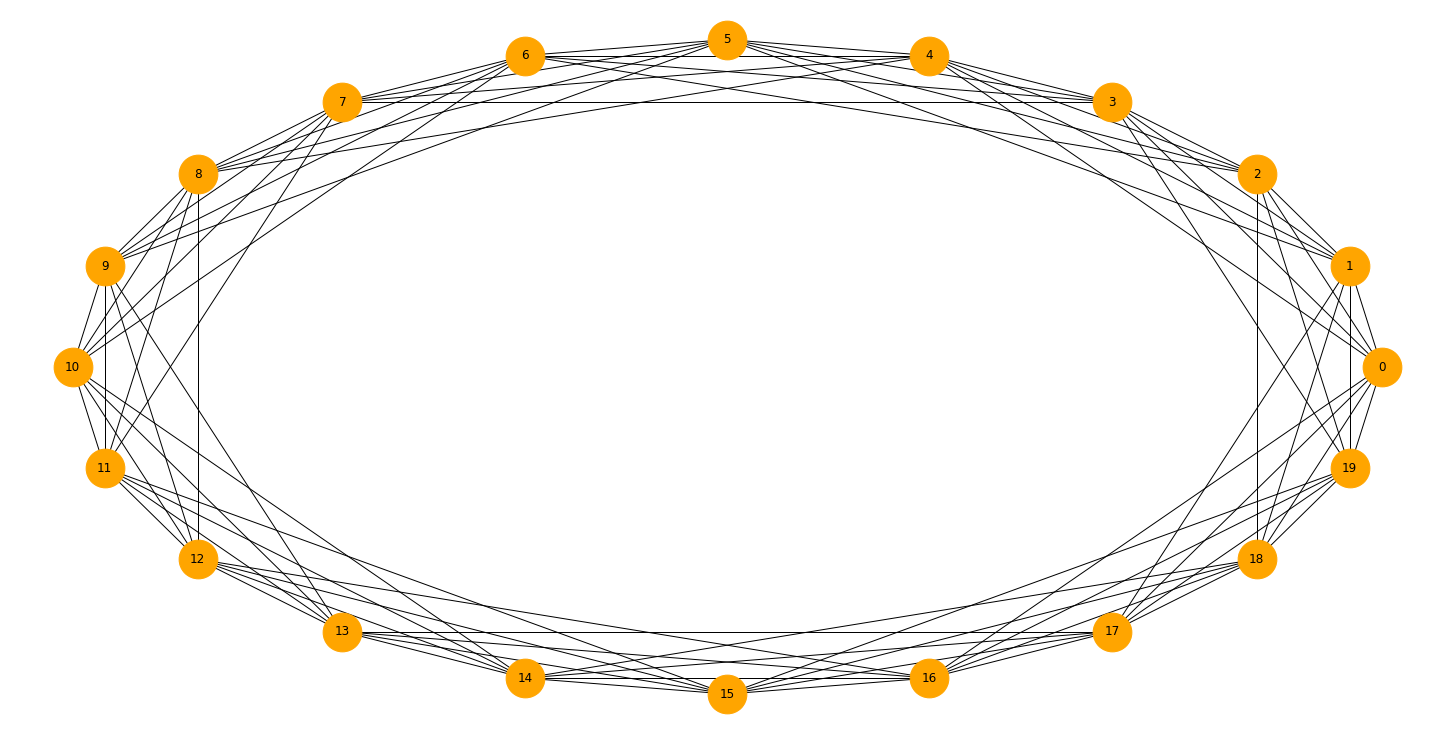

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 80
Average degree:   8.0000


In [ ]:
#Constructing Watts Strogatz Graph
ws = nx.connected_watts_strogatz_graph(n = 20,k=9,p = 0.01)
nx.draw(ws, with_labels=True, node_size=1500, node_color="orange", pos=nx.circular_layout(ws))
plt.show()
print(nx.info(ws))

In [ ]:
#Analysing Watts Strogatz Graph
print("Average Clustering Coefficient of Graph : "+str(nx.average_clustering(ws)))
print("Transitivity of the Graph : "+str(nx.transitivity(ws)))
print("Average Shortest Path Length : "+str(nx.average_shortest_path_length(ws)))

# Average clustering coefficient is Similar
# Transitivity is Similar
# Average Shortest Path Length is Larger

Average Clustering Coefficient of Graph : 0.6428571428571428
Transitivity of the Graph : 0.6428571428571429
Average Shortest Path Length : 1.736842105263158


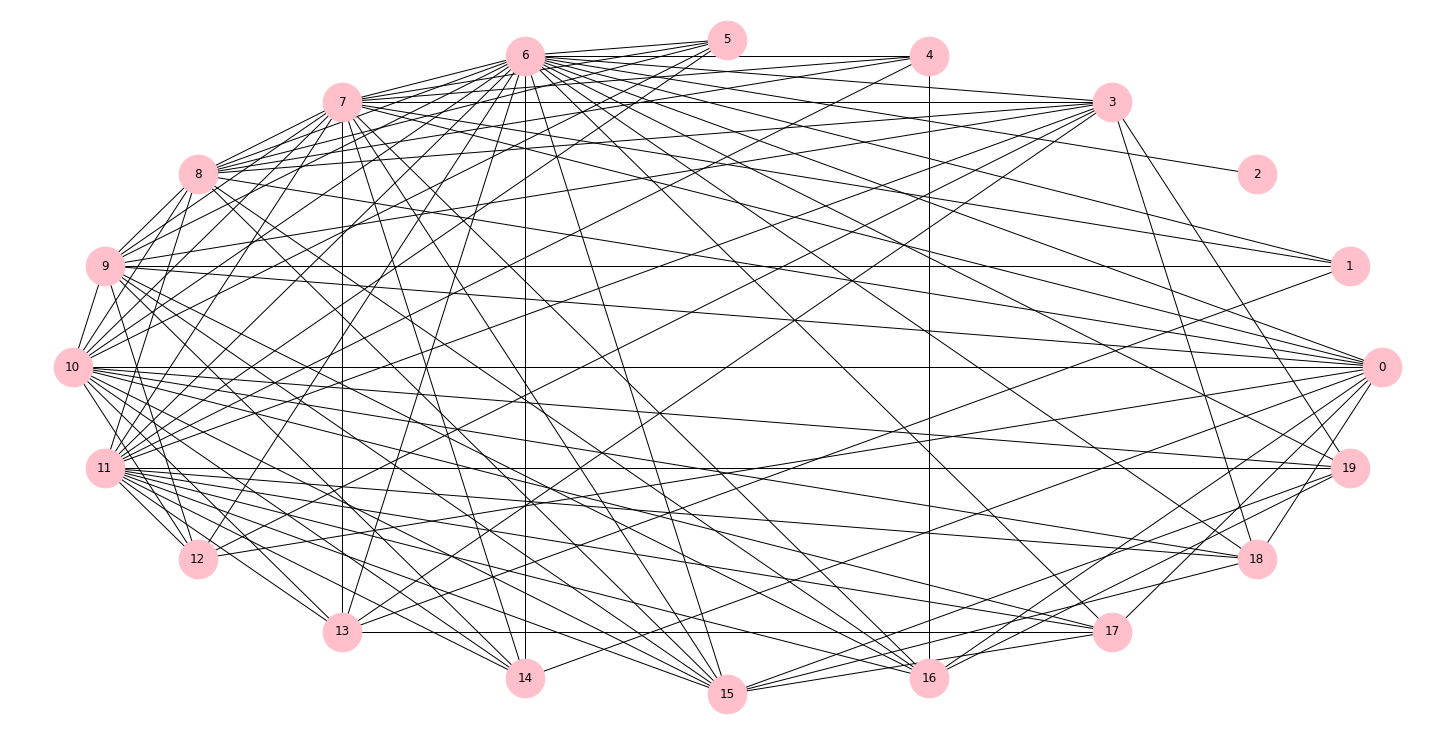

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 84
Average degree:   8.4000


In [ ]:
#Constructing Barabasi Albert Graph
ba= nx.barabasi_albert_graph(20,6)
nx.draw(ba, with_labels=True, node_size=1500, node_color="pink", pos=nx.circular_layout(ba))
plt.show()
print(nx.info(ba))

In [ ]:
#Analysing Barabasi Albert Graph
print("Average Clustering Coefficient of Graph : "+str(nx.average_clustering(ba)))
print("Transitivity of the Graph : "+str(nx.transitivity(ba)))
print("Average Shortest Path Length : "+str(nx.average_shortest_path_length(ba)))

# Average clustering coefficient is Less
# Transitivity is Less
# Average Shortest Path Length is Similar

Average Clustering Coefficient of Graph : 0.5810806350512233
Transitivity of the Graph : 0.5095785440613027
Average Shortest Path Length : 1.563157894736842


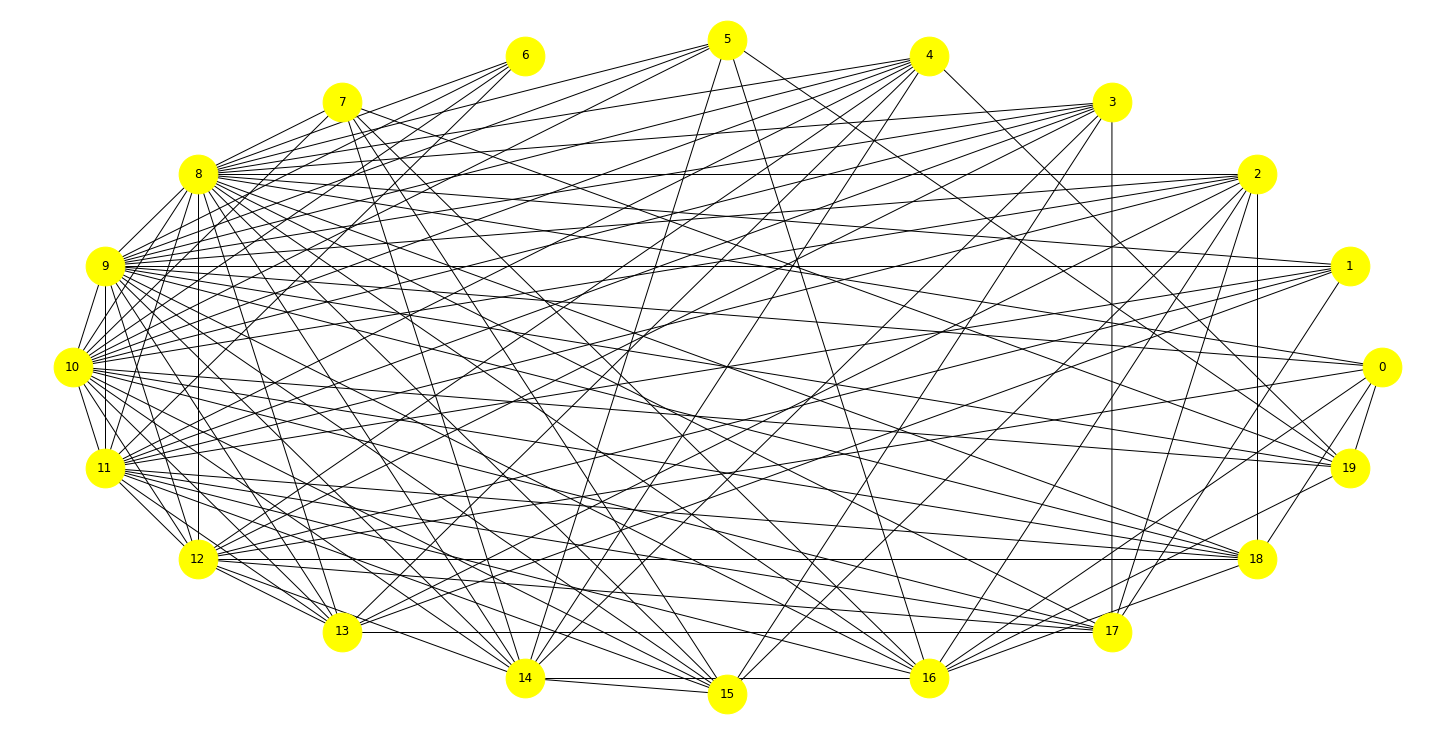

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 95
Average degree:   9.5000


In [ ]:
#Constructing Power Law Cluster Graph
pc = nx.powerlaw_cluster_graph(n=20,m=8,p=0.6)
# Parameters:	
# n (int) – the number of nodes
# m (int) – the number of random edges to add for each new node
# p (float,) – Probability of adding a triangle after adding a random edge
# seed (int, optional) – Seed for random number generator (default=None).
nx.draw(pc, with_labels=True, node_size=1500, node_color="yellow", pos=nx.circular_layout(pc))
plt.show()
print(nx.info(pc))


In [ ]:
#Analysing Power Law Cluster Graph
print("Average Clustering Coefficient of Graph : "+str(nx.average_clustering(pc)))
print("Transitivity of the Graph : "+str(nx.transitivity(pc)))
print("Average Shortest Path Length : "+str(nx.average_shortest_path_length(pc)))

# Average clustering coefficient is Similar
# Transitivity is Similar
# Average Shortest Path Length is Similar
#Best model to represent Flight Network

Average Clustering Coefficient of Graph : 0.6913211461740875
Transitivity of the Graph : 0.5905759162303665
Average Shortest Path Length : 1.5


##Section 3

In [ ]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv("airlines.csv")
dataset.head()

Airport.Code  ... Statistics.Minutes Delayed.Weather
0          ATL  ...                              19474
1          BOS  ...                               4160
2          BWI  ...                               6201
3          CLT  ...                               3792
4          DCA  ...                               4141

[5 rows x 24 columns]

In [ ]:
#total rows and colums in the dataset
dataset1=dataset[dataset['Time.Year']==2003]
#[203 rows x 24 columns]
dataset1.shape
dataset1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         203 non-null    object
 1   Airport.Name                                         203 non-null    object
 2   Time.Label                                           203 non-null    object
 3   Time.Month                                           203 non-null    int64 
 4   Time.Month Name                                      203 non-null    object
 5   Time.Year                                            203 non-null    int64 
 6   Statistics.# of Delays.Carrier                       203 non-null    int64 
 7   Statistics.# of Delays.Late Aircraft                 203 non-null    int64 
 8   Statistics.# of Delays.National Aviation System      203 non-null    int64 
 9  

In [ ]:
X= dataset1.iloc[:, [6,10]].values #Statistics.# of Delays.Carrier &&Statistics.# of Delays.Weather
#print(X)// if needed

In [ ]:
#KMeans Algorithm decides the optimum cluster number
#uses Elbow Mmethod

from sklearn.cluster import KMeans
wcss=[]

#inertia is the formula used to segregate the data points into clusters
#inertia is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster.

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
# model creation
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

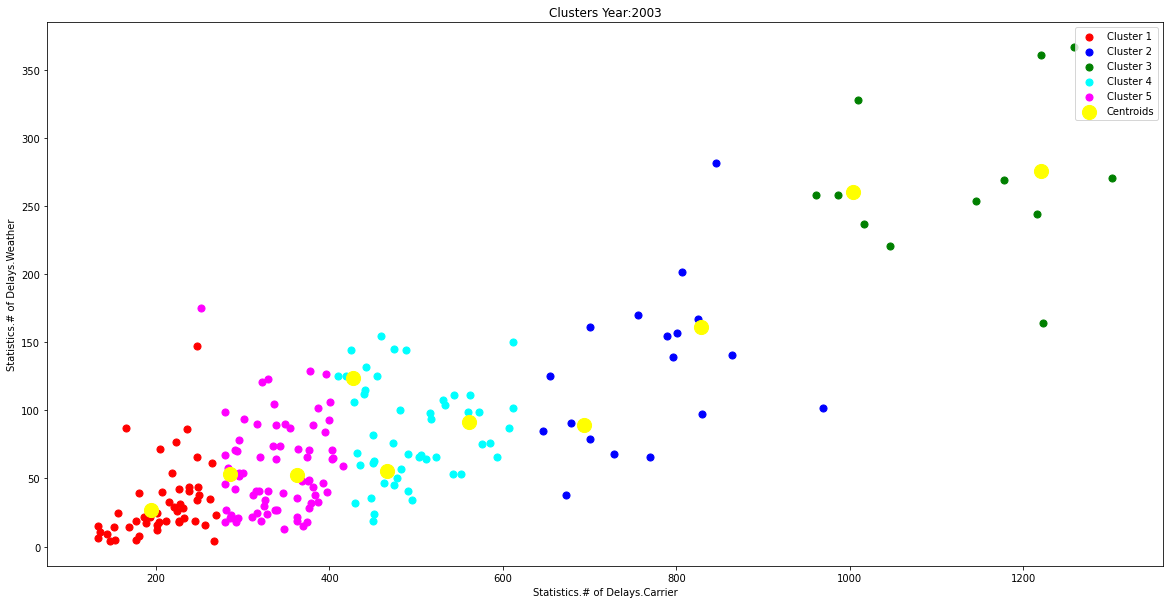

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters Year:2003')
plt.xlabel('Statistics.# of Delays.Carrier')
plt.ylabel('Statistics.# of Delays.Weather')
plt.legend()

plt.show()

#Model Interpretation 
#Cluster 1 (Red Color) -> ABOVE MEDIUM NUMBER OF AIRPLANE DELAYS and WEATHER DELAYS 
#cluster 2 (Blue Colr) -> INREMEDIATE NUMBER OF AIRPLANE DELAYS and WEATHER DELAYS
#cluster 3 (Green Color) -> HIGH NUMBER OF airplane delays and WEATHER DELAYS
#cluster 4 (cyan Color) -> MEDIUM OF airplane delays and WEATHER DELAYS
#Cluster 5 (magenta Color) -> LOW NUMBER OF AIRPLANE DELAYS and WEATHER DELAYS

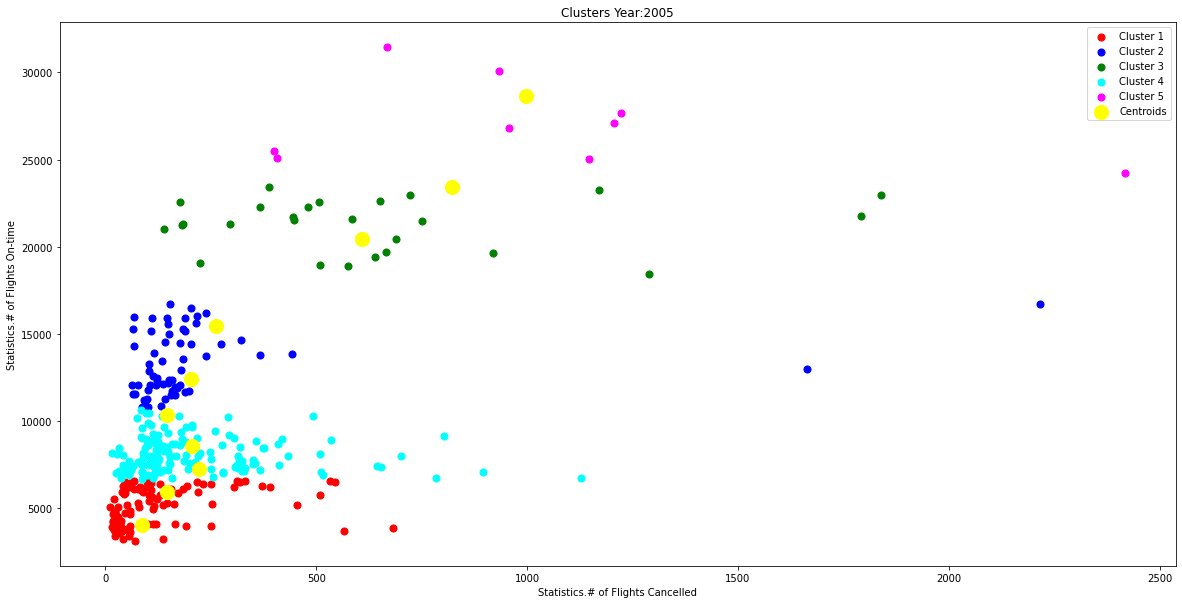

In [ ]:
dataset2=dataset[dataset['Time.Year']==2005]
dataset2.shape
X= dataset2.iloc[:, [13,16]].values#
#print(X)
#KMeans Algorithm decides the optimum cluster number
#uses Elbow Mmethod
from sklearn.cluster import KMeans
wcss=[]


#inertia is the formula used to segregate the data points into clusters
#inertia is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster.

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#model creation
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters Year:2005')
plt.xlabel('Statistics.# of Flights Cancelled')
plt.ylabel('Statistics.# of Flights On-time')
plt.legend()

plt.show()

#Model Interpretation 
#Cluster 1 (Red Color) -> MEDIUM NUMBER Of FLIGHTS ON TIME and LOW FLIGHTS CANCELLED
#cluster 2 (Blue Colr) -> INREMEDIATE NUMBER OF FLIGHTS ON TIME and LOW/FEW MEDIUM FLIGHTS CANCELLED
#cluster 3 (Green Color) -> ABOVE MEDIUM NUMBER OF FLIGHTS ON TIME and LOW & MEDIUM FLIGHTS CANCELLED
#cluster 4 (cyan Color) -> HIGH NUMBER OF FLIGHTS ON TIME and SOMEWHAT AVERAGE FLIGHTS CANCELLED
#Cluster 5 (magenta Color) -> LOW NUMBER OF FLIGHTS ON TIME and lOW FLIGHTS CANCELLED


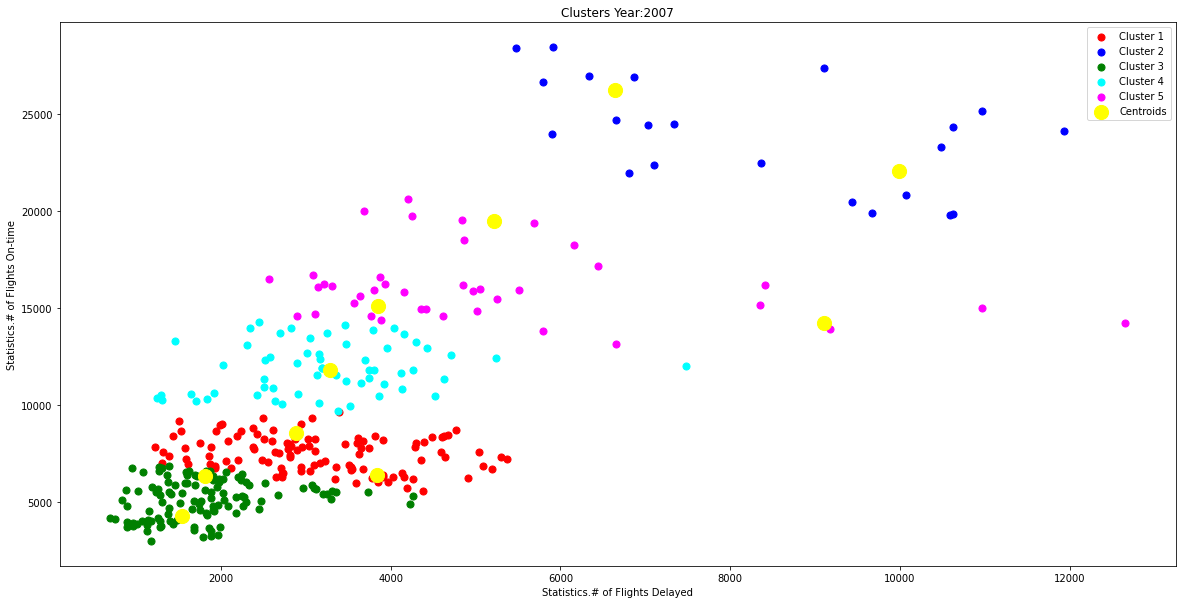

In [ ]:
dataset3=dataset[dataset['Time.Year']==2007]
dataset3.shape
X= dataset3.iloc[:, [14,16]].values
#print(X)
#KMeans Algorithm decides the optimum cluster number
#uses Elbow Mmethod
from sklearn.cluster import KMeans
wcss=[]

#inertia is the formula used to segregate the data points into clusters
#inertia is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster.

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#model creation
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters Year:2007')
plt.xlabel('Statistics.# of Flights Delayed')
plt.ylabel('Statistics.# of Flights On-time')
plt.legend()

plt.show()

#Model Interpretation 
#Cluster 1 (Red Color) -> HIGH NUMBER OF FLIGHTS ON TIME and HIGH FLIGHTS DELAYED
#cluster 2 (Blue Color) -> LOW NUMBER OF FLIGHTS ON TIME and lOW FLIGHTS DELAYED
#cluster 3 (Green Color) -> ABOVE MEDIUM NUMBER OF FLIGHTS ON TIME and MEDIUM FLIGHTS DELAYED
#cluster 4 (cyan Color) -> MEDIUM NUMBER Of FLIGHTS ON TIME and LOW FLIGHTS DELAYED
#Cluster 5 (magenta Color) -> INTERMEDIATE NUMBER OF FLIGHTS ON TIME and LOW/FEW MEDIUM FLIGHTS DELAYED

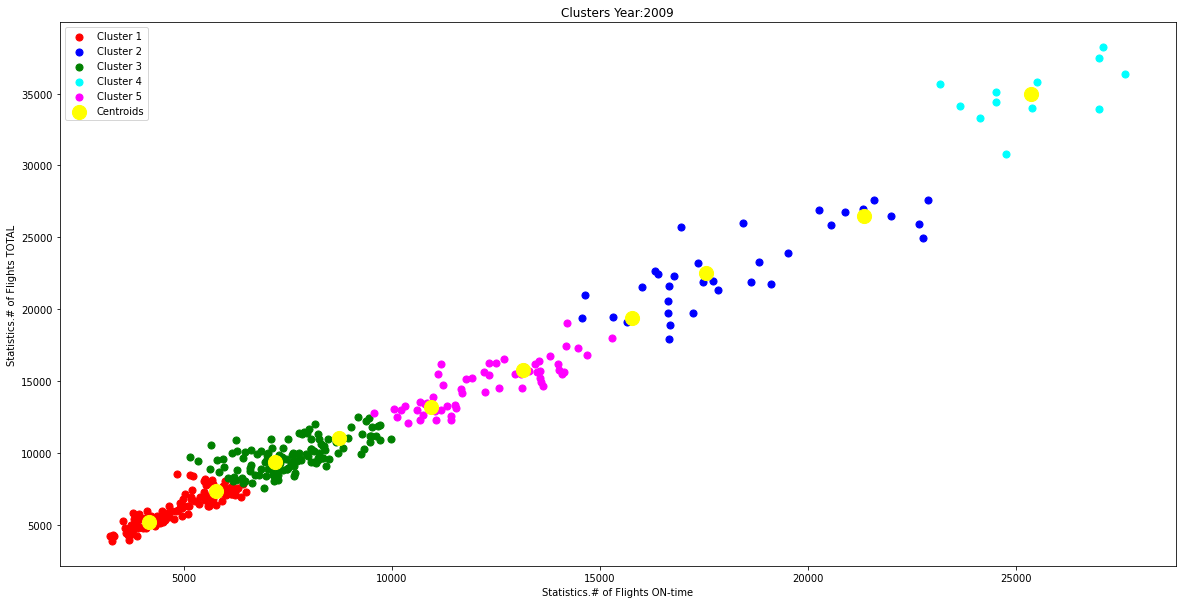

In [ ]:
dataset4=dataset[dataset['Time.Year']==2009]
dataset4.shape
X= dataset4.iloc[:, [16,17]].values
#print(X)
#KMeans Algorithm decides the optimum cluster number
#uses Elbow Mmethod
from sklearn.cluster import KMeans
wcss=[]

#inertia is the formula used to segregate the data points into clusters
#inertia is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster.

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#model creation
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters Year:2009')
plt.xlabel('Statistics.# of Flights ON-time')
plt.ylabel('Statistics.# of Flights TOTAL')
plt.legend()

plt.show()

#Model Interpretation 
#Cluster 1 (Red Color) -> MEDIUM NUMBER Of FLIGHTS ON TIME
#cluster 2 (Blue Color) -> HIGH NUMBER OF FLIGHTS ON TIME
#cluster 3 (Green Color) -> LOW NUMBER OF FLIGHTS ON TIME
#cluster 4 (cyan Color) -> ABOVE MEDIUM NUMBER OF FLIGHTS ON TIME
#Cluster 5 (magenta Color) -> INTERMEDIATE NUMBER OF FLIGHTS ON TIME

#THANK YOU!
#--- TEAM